# Install and import packages 

In [73]:
%%python -m pip install poreana
%%python -m pip install porems

In [26]:
import poreana as pa
import porems as pms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import ipywidgets as widgets



# Overview 
The data set contains the following systems at a Temperature $T=295 K$:

|Alcohol   |Aromatic|Alkene      |
|:---------|:-------|:-----------|
|Methanol  |Benzene |Cyclopentane|
|Ethanol   |Toluene |Cyclohexane |
|1-Propanol|Pyrole  |Hexane      |
|1-Butanol |Pyridine|Heptane     |




Set strings to the files in the data verse

In [72]:
drop = widgets.Dropdown(
    options=['methanol', 'ethanol', '1-propanol'],
    value="methanol",
    description='Molecule:',
    disabled=False,
)


display(drop)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
    #display(Javascript('IPython.notebook.execute_cells(3)'))

button = widgets.Button(description="Create next input")
button.on_click(run_all)
display(button)




Dropdown(description='Molecule:', options=('methanol', 'ethanol', '1-propanol'), value='methanol')

Button(description='Create next input', style=ButtonStyle())

In [71]:
molecule = drop.value

strings = {}
# Strings for pure rectangular systems
strings["dens_box"] = "Pure/{}/box_rectangular_{}_density.h5".format(molecule,molecule)
strings["mc_box"] = "Pure/{}/box_rectangular_{}_diffusion_smoluchowski.h5".format(molecule,molecule)
# Strings for pore system
strings["dens"] = "Pore/{}/pore_ideal_{}_density.h5".format(molecule,molecule)
strings["bin"] = "Pore/{}/pore_ideal_{}_diffusion_einstein.h5".format(molecule,molecule)
strings["mc"] = "Pore/{}/pore_ideal_{}_diffusion_smoluchowski.h5".format(molecule,molecule)

# Strings for amoprh pore systems (if exisit)
if molecule in ["cyclopentane","hexane","heptan"]:
    strings["dens"] = "Pore/{}/pore_amorph_{}_density.h5".format(molecule,molecule)
    strings["bin"] = "Pore/{}/pore_amorph_{}_diffusion_einstein.h5".format(molecule,molecule)
    strings["mc"] = "Pore/{}/pore_amorph_{}_diffusion_smoluchowski.h5".format(molecule,molecule)
    


# Density

(0.0, 2.5)

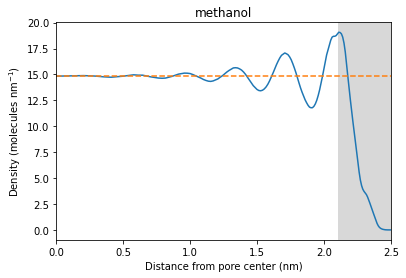

In [63]:
dens = pa.density.bins(strings["dens"], is_print=False)
plt.plot(dens["sample"]["data"]["in_width"][:-1],[den for den in dens["num_dens"]["in"]])
plt.plot(dens["sample"]["data"]["ex_width"][:-1],[dens["mean"]["ex"] for i in dens["num_dens"]["ex"][:-1]], linestyle = "--")
plt.axvspan(xmin=2.1, xmax=2.5, facecolor="grey", alpha=0.3)
plt.ylabel("Density (molecules $\mathrm{nm}^{-1}$)")
plt.xlabel("Distance from pore center (nm)")
plt.title(molecule)
plt.xlim([0,2.5])

# Diffusion

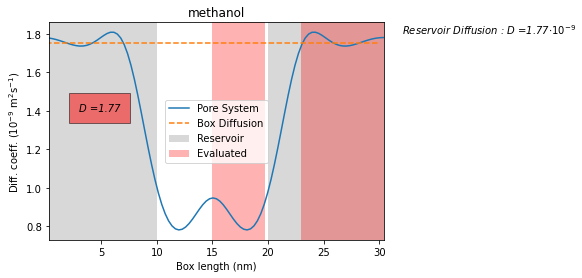

In [86]:
mc_box = pa.diffusion.mc_fit(strings["mc_box"], len_step = [10,20,30,40,50,60], is_plot=False, is_print=False)
mc_pore = pa.diffusion.mc_profile(strings["mc"], len_step = [10,20,30,40,50,60], kwargs={"label": "Pore System"})
res = pa.diffusion.mc_fit(strings["mc"], len_step = [10,20,30,40,50,60], section = [0,7], is_plot=False, is_print=False)
sns.lineplot(x=np.linspace(0,30.1,100),y=[mc_box[0] for i in range(100)], linestyle="--", label="Box Diffusion")
plt.title(molecule)
plt.text(3, 1.4, 'D =' + "%.2f" % (res[0])  , style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.text(32, 1.8 , 'Reservoir Diffusion : D =' + "%.2f" % (res[0]) +"$\\cdot 10^{-9}$"  , style='italic',
        )
# Plot area
plt.axvspan(xmin=0, xmax=10, facecolor="grey", alpha=0.3, label = "Reservoir")
plt.axvspan(xmin=20, xmax=31, facecolor="grey", alpha=0.3)
plt.axvspan(xmin=15, xmax=19.7, facecolor="red", alpha=0.3, label = "Evaluated")
plt.axvspan(xmin=23, xmax=31, facecolor="red", alpha=0.3)
plt.legend()